# Data Preprocessing

In [1]:
# importing necessory libraries
# if sklearn doesnot work run this line -> "!pip install sklearn"
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('006_co2.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df.head()   # display head of the data set , by default display 5 rows

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()      # display the information of the data set!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.shape   # tells us about the shape of the data set (rows , columns)

(7385, 12)

In [6]:
len(df)  # how many samples/rows in the data set!

7385

In [7]:
df.isna().sum()     # tells about the null values in the data set

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.isna().sum().sum()     # tells about the total null values of the data set!

0

In [9]:
df[["Make",'Fuel Type']] # disply the columns of your desire , for one column -> df["Make"]

,Make,Fuel Type
0,ACURA,Z
1,ACURA,Z
2,ACURA,Z
3,ACURA,Z
4,ACURA,Z
...,...,...
7380,VOLVO,Z
7381,VOLVO,Z
7382,VOLVO,Z
7383,VOLVO,Z


In [10]:
df['Make'].value_counts()   # dispaly the frequency of items in a column

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

In [11]:
df['Model'].value_counts()

Model
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: count, Length: 2053, dtype: int64

In [12]:
# filtering ROWS
df[df['Make'] == 'KIA']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
602,KIA,CADENZA,FULL-SIZE,3.3,6,A6,X,12.7,8.8,10.9,26,251
603,KIA,FORTE,MID-SIZE,1.8,4,A6,X,9.6,6.6,8.3,34,191
604,KIA,FORTE,MID-SIZE,1.8,4,M6,X,9.3,6.4,8.0,35,184
605,KIA,FORTE,MID-SIZE,2.0,4,A6,X,9.8,6.6,8.4,34,193
606,KIA,FORTE,MID-SIZE,2.0,4,M6,X,9.7,6.8,8.4,34,193
...,...,...,...,...,...,...,...,...,...,...,...,...
7053,KIA,Sportage,SUV - SMALL,2.4,4,AS6,X,10.1,7.6,9.0,31,214
7054,KIA,Sportage AWD,SUV - SMALL,2.0,4,AS6,X,12.1,9.6,11.0,26,261
7055,KIA,Sportage AWD,SUV - SMALL,2.4,4,AS6,X,10.8,9.1,10.0,28,239
7056,KIA,Stinger AWD,MID-SIZE,3.3,6,AS8,Z,13.6,9.6,11.8,24,279


In [13]:
# filtering COLUMNS
df[df['Make'] == 'KIA'][['Make','Model','Fuel Type']]

,Make,Model,Fuel Type
602,KIA,CADENZA,X
603,KIA,FORTE,X
604,KIA,FORTE,X
605,KIA,FORTE,X
606,KIA,FORTE,X
...,...,...,...
7053,KIA,Sportage,X
7054,KIA,Sportage AWD,X
7055,KIA,Sportage AWD,X
7056,KIA,Stinger AWD,Z


In [14]:
# using Label encoding
from sklearn.preprocessing import LabelEncoder
# encoding Make column
le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

In [15]:
# encoding Fuel Type column
le = LabelEncoder()
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

In [16]:
# encoding Transmission column
le = LabelEncoder()
df['Transmission'] = le.fit_transform(df['Transmission'])

In [17]:
# encoding Vehicle Class column
le = LabelEncoder()
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   int32  
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   int32  
 6   Fuel Type                         7385 non-null   int32  
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [19]:
# droping columns
df.drop('Model',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   int32  
 1   Vehicle Class                     7385 non-null   int32  
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   int32  
 5   Fuel Type                         7385 non-null   int32  
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int32(4), int64(3)
memory usage: 519.4 KB


# Correlation

In [20]:
correlation = df.corr()
correlation

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Vehicle Class,-0.029558,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),0.182649,-0.277606,-0.757854,-0.719321,0.331213,-0.016880,-0.927059,-0.890638,-0.925576,1.000000,-0.907426


<Axes: >

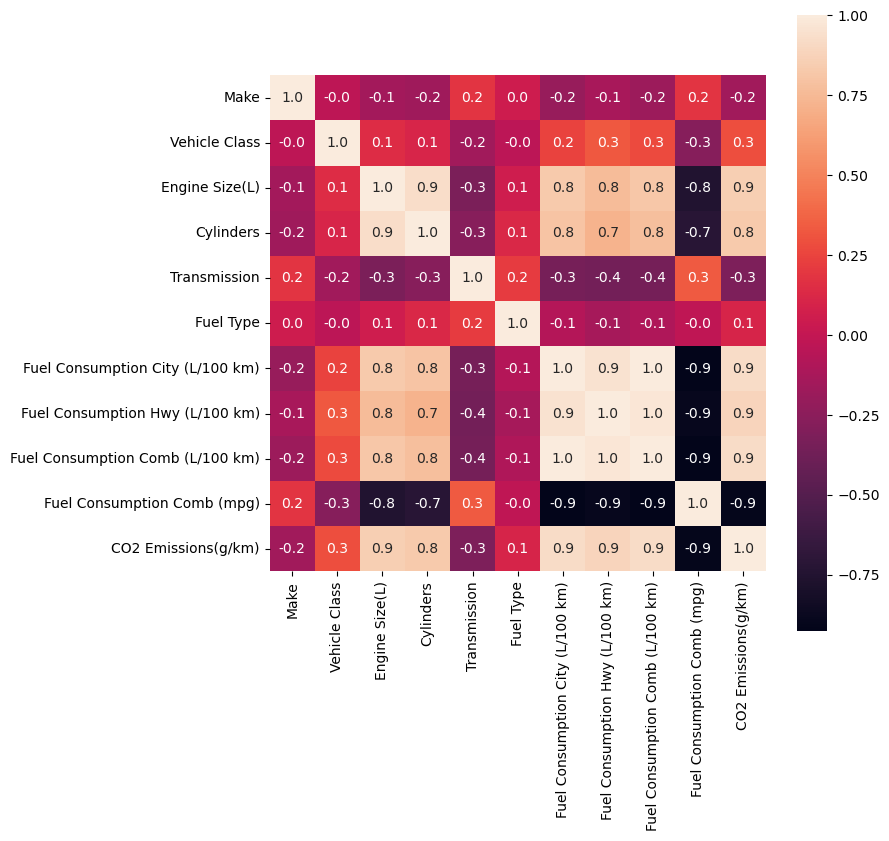

In [21]:
# constructing the correlation heat map 
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True, fmt='.1f',annot=True)

In [22]:
# drop the columns on bases of correlation heat map
# if the more then 50% of columns are negitive corelated we will drop them 